# The discrete model.  

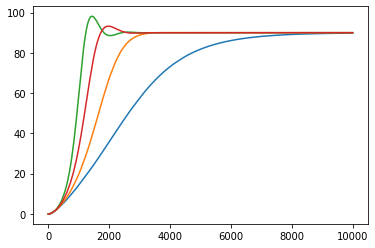

In [1]:
%clear
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense
from sklearn.metrics import mean_squared_error

c1=4.2816e-7
c2=1.568
c3=5.7534
di=0.001
T=10000

def function(a):

 phi1=np.zeros((1, T)).squeeze()
 phi2=np.zeros((1,T)).squeeze()
 sphi1=np.zeros((1,T)).squeeze()
 sphi2=np.zeros((1,T)).squeeze()
 for t in range(1,T-1):
    #for a in range(1,100):
        hinput=a*1000/(4*np.pi)
    
        phi1[t+1]=phi1[t]+di*phi2[t]
        phi2[t+1]=phi2[t]+di*(-c3*phi2[t]+c2*np.cos(phi1[t])+c1*hinput*abs(hinput)*np.sin(2*phi1[t]))
        sphi1[t+1]=round(np.rad2deg(phi1[t+1]),2)
        sphi2[t+1]=round(100*phi2[t+1])
 
 return [phi1,phi2,sphi1,sphi2]

[a1,a2,a3,a4]=[20,40,60,80]
[phi1_a1,phi2_a1,sphi1_a1,sphi2_a1]=function(a1)
[phi1_a2,phi2_a2,sphi1_a2,sphi2_a2]=function(a2)
[phi1_a3,phi2_a3,sphi1_a3,sphi2_a3]=function(a3)
[phi1_a4,phi2_a4,sphi1_a4,sphi2_a4]=function(a4)


plt.plot(sphi1_a1)
plt.plot(sphi1_a2)
plt.plot(sphi1_a4)
plt.plot(sphi1_a3)

In [ ]:
mea=np.zeros((10,10))

# for t in range(1,10):
#   for s in range(8):
mea[4,5]=3
mea

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 3., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Text(0, 0.5, 'Angular velocity')

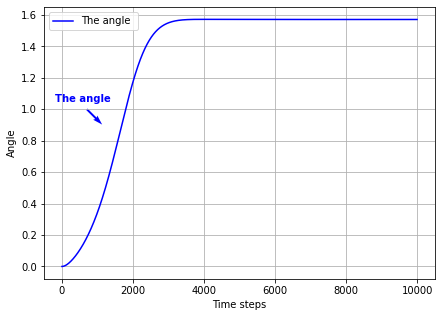

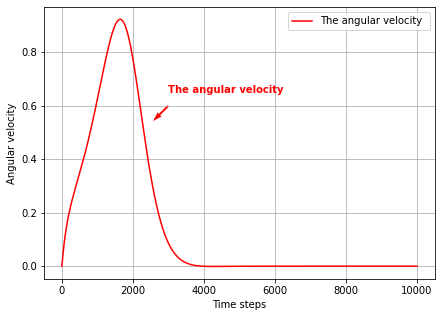

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(phi1_a2,"b",label="The angle ")
plt.legend()
plt.text(-200,1.05,"The angle",weight="bold",color="blue")
plt.quiver(700, 1, 1, -1, color='b', width=0.005)
plt.grid(True)
plt.xlabel("Time steps")
plt.ylabel("Angle")

plt.figure(figsize=(7,5))
plt.plot(phi2_a2,"r",label="The angular velocity ")
plt.legend()
plt.text(3000,0.65,"The angular velocity",weight="bold",color="red")
plt.quiver(3000, 0.6, -1, -1, color='r', width=0.005)
plt.grid(True)
plt.xlabel("Time steps")
plt.ylabel("Angular velocity")

# 1. Predict the acceleration. Just use one control a=50.

The output is (phi2[1:4001]-phi2[0:4000]), and the input is (phi1[0:4001], phi2[0:4000],a[0:4000]). 

In [ ]:

split_time =4000
shift=1
sampling_time=1
interval=1
length=np.int(split_time/interval)
#test four input a=10, 30, 50, 70. 
[a1_test,a2_test,a3_test,a4_test]=[50,30,50,70]
[phi1_a1_test,phi2_a1_test,sphi1_a1_test,sphi2_a1_test]=function(a1_test)
[phi1_a2_test,phi2_a2_test,sphi1_a2_test,sphi2_a2_test]=function(a2_test)
[phi1_a3_test,phi2_a3_test,sphi1_a3_test,sphi2_a3_test]=function(a3_test)
[phi1_a4_test,phi2_a4_test,sphi1_a4_test,sphi2_a4_test]=function(a4_test)

phi1_all_test=np.concatenate((phi1_a1_test,phi1_a2_test,phi1_a3_test,phi1_a4_test),axis=0)
phi1_all_test=phi1_all_test/sampling_time


input_a1_test=a1_test*np.ones(T)
input_a2_test=a2_test*np.ones(T)
input_a3_test=a3_test*np.ones(T)
input_a4_test=a4_test*np.ones(T)

input_test=np.concatenate((input_a1_test,input_a2_test,input_a3_test,input_a4_test),axis=0)
input_test=input_test.reshape(4,T,1)
input_test=input_test[:,:split_time:interval].reshape(4*length)

series_test=phi1_all_test.reshape(4,T,1)[:,:T:interval]
series1_test=series_test[:,:length].reshape(4*length)
series2_test=series_test[:,1:length+1].reshape(4*length)
series3_test=series_test[:,2:length+2].reshape(4*length)

# series_input_test=np.stack((phi1_a1_test[:split_time], phi2_a1_test[:split_time], input_a1_test[:split_time]),axis=1)

# x_test=series_input_test.reshape(split_time,3)
# y_test=phi2_a1_test[1:split_time+1]-phi2_a1_test[:split_time]

#Shuffle the data
series_input_test=np.stack((phi1_a1_test[:split_time], phi2_a1_test[:split_time],input_a1_test[:split_time],(phi2_a1_test[1:split_time+1]-phi2_a1_test[:split_time])/di),axis=1)
series_input_test=series_input_test.reshape(split_time,4)
series_input_test=tf.random.shuffle(series_input_test)
x_test=series_input_test[:,0:3]
y_test=series_input_test[:,3]


In [ ]:


model = tf.keras.Sequential([#tf.keras.layers.Dense(length, activation="relu"),
                             #tf.keras.layers.Dense(32, activation="relu"),
                             #tf.keras.layers.Dropout(0.8),
                             tf.keras.layers.Dense(60, activation="elu"),
                             tf.keras.layers.Dense(30, activation="elu"),
                             tf.keras.layers.Dense(1)])

optimizer = tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
#model.compile(optimizer='sgd', loss='mean_squared_error')
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('mae')<0.098):
        print("\n 99% acc reached")
        self.model.stop_training = True
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-6 * 10**(epoch / 20))
ES= tf.keras.callbacks.EarlyStopping(monitor='mae', mode='min', patience=10)
history= model.fit(x_test, y_test, epochs=500, callbacks=[CustomCallbacks()])


Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

125/125 [==============================] - 0s 1ms/step - loss: 0.4035 - mae: 0.7444
Epoch 2/500
125/125 [==============================] - 0s 1ms/step - loss: 0.3095 - mae: 0.6236
Epoch 3/500
125/125 [==============================] - 0s 1ms/step - loss: 0.3005 - mae: 0.6186
Epoch 4/500
125/125 [==============================] - 0s 1ms/step - loss: 0.2831 - mae: 0.5879
Epoch 5/500
125/125 [==============================] - 0s 1ms/step - loss: 0.2733 - mae: 0.5735
Epoch 6/500
125/125 [=======

In [ ]:
model.save('Dense1.h5') 

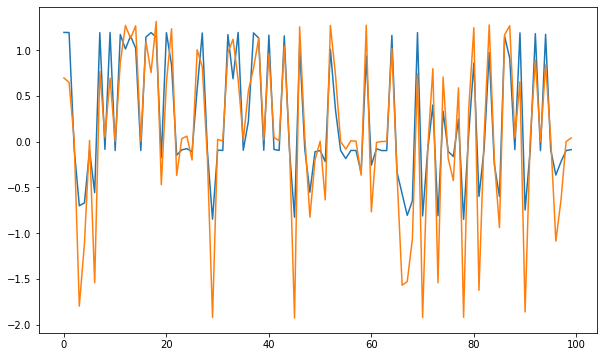

In [ ]:
trainPredict = model.predict(x_test)
plt.figure(figsize=(10, 6))
plt.plot(trainPredict[3900:4000])
plt.plot(y_test[3900:4000])

In [ ]:
a_test=50
random_length=8000

x1=np.zeros((1, random_length)).squeeze()
x2=np.zeros((1,random_length)).squeeze()
x1[0]=0.1
x2[0]=0.1

c1=4.2816e-7
c2=1.568
c3=5.7534

for t in range(random_length-1):
    #for a in range(1,100):
        hinput=a_test*1000/(4*np.pi)
    
        x1[t+1]=x1[t]+di*x2[t]
        x2[t+1]=x2[t]+di*(-c3*x2[t]+c2*np.cos(x1[t])+c1*hinput*abs(hinput)*np.sin(2*x1[t]))
      
x1_test=np.zeros((1, random_length)).squeeze()
x2_test=np.zeros((1,random_length)).squeeze()
dx1=np.zeros((1, random_length)).squeeze()
x1_test[0]=x1[0]
x2_test[0]=x2[0]

for t in range(random_length-1):
  dx1[t]=model.predict([[x1_test[t],x2_test[t],a_test]])
  x1_test[t+1]=x1_test[t]+x2_test[t]*di #  x1_test[t+1]=(x1_test[t]+error)+(x2_test[t]+error_2)*di
  x2_test[t+1]=x2_test[t]+dx1[t]*di #  x2_test[t+1]=x2_test[t]+(dx1[t]+error)*di
  # if x1_test[t+1]>1.57:
  #    x1_test[t+1]=1.57
#x_difference= x_difference.reshape(length,2)
# plt.figure(figsize=(10, 6))
# plot_series(range(length), x_difference[:,0])
# plot_series(range(length), np.array(trainPredict[:,0]))


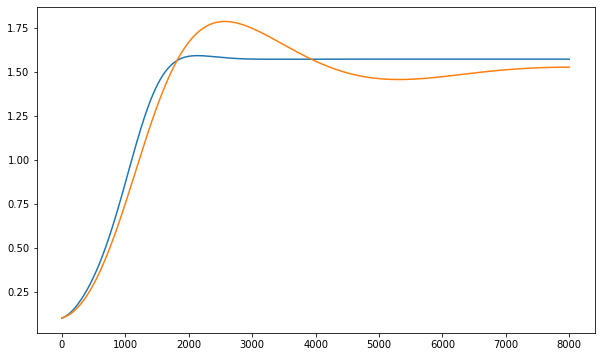

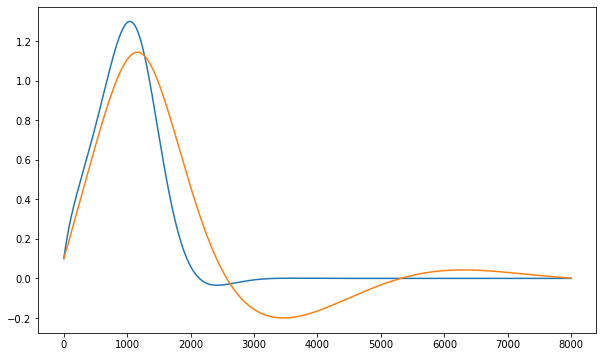

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x1)
plt.plot(x1_test)
plt.savefig("50test_phi1.png")
plt.figure(figsize=(10, 6))
plt.plot(x2)
plt.plot(x2_test)
plt.savefig("50test_phi2.png")

# 2. Predict the acceleration. Use 4 controls a=[20,40,60,80].
Use model 1 and model 2

The output is (phi2[1:4001]-phi2[0:4000]), and the input is (phi1[0:4001], phi2[0:4000],a[0:4000]). 

Model 1

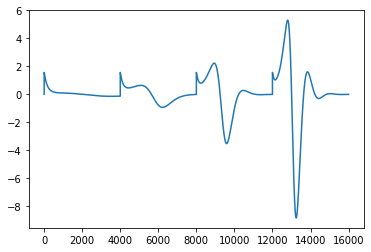

In [ ]:
[a1,a2,a3,a4]=[20,40,60,80]
[phi1_a1,phi2_a1,sphi1_a1,sphi2_a1]=function(a1)
[phi1_a2,phi2_a2,sphi1_a2,sphi2_a2]=function(a2)
[phi1_a3,phi2_a3,sphi1_a3,sphi2_a3]=function(a3)
[phi1_a4,phi2_a4,sphi1_a4,sphi2_a4]=function(a4)

di=0.001
split_time =4000
shift=1
sampling_time=1
phi1_all=np.concatenate((phi1_a1[:split_time],phi1_a2[:split_time],phi1_a3[:split_time],phi1_a4[:split_time]),axis=0)
phi2_all=np.concatenate((phi2_a1[:split_time],phi2_a2[:split_time],phi2_a3[:split_time],phi2_a4[:split_time]),axis=0)
phi2_diff_all=np.concatenate((phi2_a1[1:split_time+1]-phi2_a1[:split_time],phi2_a2[1:split_time+1]-phi2_a2[:split_time],
                              phi2_a3[1:split_time+1]-phi2_a3[:split_time],phi2_a4[1:split_time+1]-phi2_a4[:split_time]),axis=0)
phi2_diff_all=phi2_diff_all/di


input_a1=a1*np.ones(T)
input_a2=a2*np.ones(T)
input_a3=a3*np.ones(T)
input_a4=a4*np.ones(T)

input=np.concatenate((input_a1[:split_time],input_a2[:split_time],input_a3[:split_time],input_a4[:split_time]),axis=0)
# input=input.reshape(4,T,1)
# input=input[:,:split_time:interval].reshape(4*length)


# series1=phi1_all.reshape(4,T,1)[:,:T:interval]
# series11=series1[:,:length].reshape(4*length)
# series12=series1[:,1:length+1].reshape(4*length)
# series12_11=(series1[:,1:length+1]-series1[:,:length]).reshape(4*length)

# series2=phi2_all.reshape(4,T,1)[:,:T:interval]
# series21=series2[:,:length].reshape(4*length)
# series22=series2[:,1:length+1].reshape(4*length)
# series22_21=(series2[:,1:length+1]-series2[:,:length]).reshape(4*length)

series_input=np.stack((phi1_all,phi2_all,input,phi2_diff_all),axis=1)
series_input=series_input.reshape(4*split_time,4)
series_input=tf.random.shuffle(series_input)
x_train=series_input[:,0:3]
y_train=series_input[:,3]

plt.plot(phi2_diff_all)



In [ ]:


#input=a*np.ones(split_time)[0:split_time-shift]


#x_train=np.stack((input,x_train1), axis=1)
#x_train=x_train.reshape(1,split_time-shift,2)

model = tf.keras.Sequential([#tf.keras.layers.Dense(length, activation="relu"),
                             #tf.keras.layers.Dense(32, activation="relu"),
                             #tf.keras.layers.Dropout(0.8),
                             tf.keras.layers.Dense(60, activation="elu"),
                             tf.keras.layers.Dense(30, activation="elu"),
                             tf.keras.layers.Dense(1)])

optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
#model.compile(optimizer='sgd', loss='mean_squared_error')
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('mae')<0.098):
        print("\n 99% acc reached")
        self.model.stop_training = True
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-6 * 10**(epoch / 20))
ES= tf.keras.callbacks.EarlyStopping(monitor='mae', mode='min', patience=10)
history= model.fit(x_train, y_train, epochs=500)#, callbacks=[CustomCallbacks()])




Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

500/500 [==============================] - 1s 1ms/step - loss: 0.8015 - mae: 1.1883
Epoch 2/500
500/500 [==============================] - 1s 1ms/step - loss: 0.6049 - mae: 0.9288
Epoch 3/500
500/500 [==============================] - 1s 1ms/step - loss: 0.5647 - mae: 0.8570
Epoch 4/500
500/500 [==============================] - 1s 1ms/step - loss: 0.5523 - mae: 0.8386
Epoch 5/500
500/500 [==============================] - 1s 1ms/step - loss: 0.5451 - mae: 0.8271
Epoch 6/500
500/500 [=======

In [ ]:
model.save('Dense2_1.h5') 

**Model 2**
The input is (phi1(t),phi2(t),dphi2(t)
output is (phi1(t+1)/scale,phi(t+1)/scale)

In [ ]:
a_test=50
random_length=5000

x1=np.zeros((random_length)).squeeze()
x2=np.zeros((random_length)).squeeze()
x1[0]=0.1
x2[0]=0

c1=4.2816e-7
c2=1.568
c3=5.7534
model1 = tf.keras.models.load_model("Dense2_1.h5")

for t in range(random_length-1):
    #for a in range(1,100):
        hinput=a_test*1000/(4*np.pi)
    
        x1[t+1]=x1[t]+di*x2[t]
        x2[t+1]=x2[t]+di*(-c3*x2[t]+c2*np.cos(x1[t])+c1*hinput*abs(hinput)*np.sin(2*x1[t]))
      
x1_test=np.zeros((1, random_length)).squeeze()
x2_test=np.zeros((1,random_length)).squeeze()
x1_predict=np.zeros((1, random_length)).squeeze()
x2_predict=np.zeros((1,random_length)).squeeze()
dx1=np.zeros((1, random_length)).squeeze()
x1_test[0]=x1[0]
x2_test[0]=x2[0]
x1_predict[0]=x1[0]
x2_predict[0]=x2[0]
for t in range(random_length-1):
  dx1[t]=model1.predict([[x1_test[t],x2_test[t],a_test]])
  x1_test[t+1]=x1_test[t]+x2_test[t]*di
  x2_test[t+1]=x2_test[t]+dx1[t]*di

In [ ]:

series_input=np.stack((x1_test/(di*di),x2_test/di,dx1,x1/(di*di),x2/di),axis=1)
series_input=series_input.reshape(random_length,5)
series_input=tf.random.shuffle(series_input)
x_train2=series_input[:,0:3]
y_train2=series_input[:,3:5]

In [ ]:
model = tf.keras.Sequential([#tf.keras.layers.Dense(length, activation="relu"),
                             #tf.keras.layers.Dense(32, activation="relu"),
                             #tf.keras.layers.Dropout(0.8),
                             tf.keras.layers.Dense(60, activation="elu"),
                             tf.keras.layers.Dense(30, activation="elu"),
                             tf.keras.layers.Dense(2)])

optimizer = tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
#model.compile(optimizer='sgd', loss='mean_squared_error')
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('mae')<0.098):
        print("\n 99% acc reached")
        self.model.stop_training = True
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-6 * 10**(epoch / 20))
ES= tf.keras.callbacks.EarlyStopping(monitor='mae', mode='min', patience=10)
history= model.fit(x_train2, y_train2, epochs=500)#, callbacks=[CustomCallbacks()])


Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

157/157 [==============================] - 0s 1ms/step - loss: 200621113344.0000 - mae: 200621113344.0000
Epoch 2/500
157/157 [==============================] - 0s 1ms/step - loss: 910387328.0000 - mae: 910387328.0000
Epoch 3/500
157/157 [==============================] - 0s 1ms/step - loss: 154287.0469 - mae: 154287.5469
Epoch 4/500
157/157 [==============================] - 0s 1ms/step - loss: 153466.2344 - mae: 153466.7500
Epoch 5/500
157/157 [==============================] - 0s 1ms/step

In [ ]:
model.save('Dense2_2.h5') 

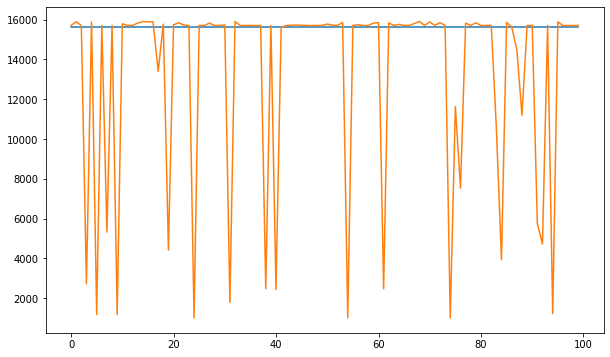

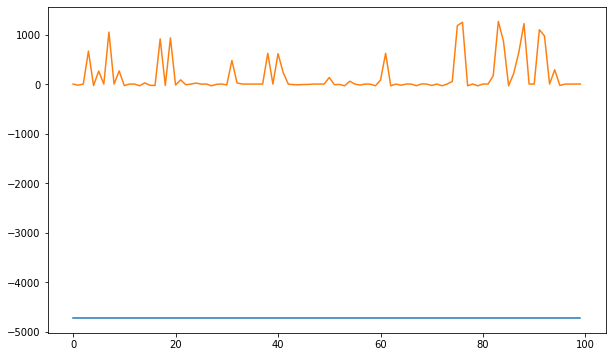

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
sampling_time=1
trainPredict = model.predict(x_train2)
plt.figure(figsize=(10, 6))
plt.plot(trainPredict[3900:4000,0]*0.01)
plt.plot(y_train2 [3900:4000,0]*0.01)

plt.figure(figsize=(10, 6))
plt.plot(trainPredict[3900:4000,1]*sampling_time)
plt.plot(y_train2 [3900:4000,1]*sampling_time)
# plt.figure(figsize=(10, 6))
# plt.title('a1')
# plot_series(range(length), x_train[0,:,0])
# plot_series(range(length), np.array(trainPredict[0,:,0]))

# plt.figure(figsize=(10, 6))
# plt.title('a2')
# plot_series(range(length), x_train[1,:,0])
# plot_series(range(length), np.array(trainPredict[1,:,0]))

# plt.figure(figsize=(10, 6))
# plt.title('a3')
# plot_series(range(length), x_train[2,:,0])
# plot_series(range(length), np.array(trainPredict[2,:,0]))

# plt.figure(figsize=(10, 6))
# plt.title('a4')
# plot_series(range(length), x_train[3,:,0])
# plot_series(range(length), np.array(trainPredict[3,:,0]))


In [ ]:
a_test=50
random_length=5000

x1=np.zeros((random_length)).squeeze()
x2=np.zeros((random_length)).squeeze()
x1[0]=0.1
x2[0]=0

c1=4.2816e-7
c2=1.568
c3=5.7534
model1 = tf.keras.models.load_model("Dense2_1.h5")
model2 = tf.keras.models.load_model("Dense2_2.h5")

for t in range(random_length-1):
    #for a in range(1,100):
        hinput=a_test*1000/(4*np.pi)
    
        x1[t+1]=x1[t]+di*x2[t]
        x2[t+1]=x2[t]+di*(-c3*x2[t]+c2*np.cos(x1[t])+c1*hinput*abs(hinput)*np.sin(2*x1[t]))
      
x1_test=np.zeros((1, random_length)).squeeze()
x2_test=np.zeros((1,random_length)).squeeze()
x1_predict=np.zeros((1, random_length)).squeeze()
x2_predict=np.zeros((1,random_length)).squeeze()
dx1=np.zeros((1, random_length)).squeeze()
x1_test[0]=x1[0]
x2_test[0]=x2[0]
x1_predict[0]=x1[0]
x2_predict[0]=x2[0]
for t in range(random_length-1):
  dx1[t]=model1.predict([[x1_test[t],x2_test[t],a_test]])
  [[x1_predict[t+1],x2_predict[t+1]]]=model2.predict([[x1_predict[t],x2_predict[t],dx1[t]]])
  x1_test[t+1]=x1_predict[t+1]*di*di#  x1_test[t+1]=(x1_test[t]+error)+(x2_test[t]+error_2)*di
  x2_test[t+1]=x2_predict[t+1]*di#  x2_test[t+1]=x2_test[t]+(dx1[t]+error)*di
  # x1_test[t+1]=x1_test[t]+x2_test[t]*di
  # x2_test[t+1]=x2_test[t]+dx1[t]*di
  # if x1_test[t+1]>1.57:
  #    x1_test[t+1]=1.57
#x_difference= x_difference.reshape(length,2)
# plt.figure(figsize=(10, 6))
# plot_series(range(length), x_difference[:,0])
# plot_series(range(length), np.array(trainPredict[:,0]))


array([0.1       , 0.1       , 0.10000291, ..., 1.57080466, 1.57080463,
       1.57080459])

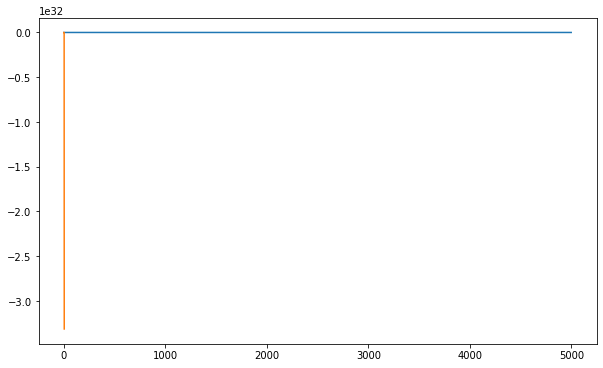

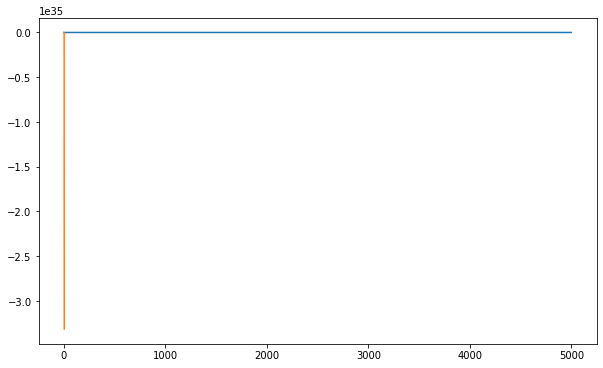

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(x1)
plt.plot(x1_test)
plt.savefig("50test_phi1.png")

plt.figure(figsize=(10, 6))
plt.plot(x2)
plt.plot(x2_test)
plt.savefig("50test_phi2.png")
x1

# 3. Predict the acceleration.Just know the angle
Use 4 controls a=[20,40,60,80].
Use model 1 and model 2

The output is ( phi1[2:4002]-phi1[1:4001])-(phi1[1:4001]-phi1[0:4000]), and the input is (phi1[0:4000], phi1[1:4001]-phi1[0:4000],a[0:4000]). 

In [ ]:

for sigma in range (1,10):
    x[sigma]=sigma/100

NameError: ignored

In [ ]:
[a1,a2,a3,a4]=[20,40,60,80]
[phi1_a1,phi2_a1,sphi1_a1,sphi2_a1]=function(a1)
[phi1_a2,phi2_a2,sphi1_a2,sphi2_a2]=function(a2)
[phi1_a3,phi2_a3,sphi1_a3,sphi2_a3]=function(a3)
[phi1_a4,phi2_a4,sphi1_a4,sphi2_a4]=function(a4)

split_time =4000
shift=1
sampling_time=1
phi1_all=np.concatenate((phi1_a1[:split_time],phi1_a2[:split_time],phi1_a3[:split_time],phi1_a4[:split_time]),axis=0)

phi2_a1[:split_time]=(phi1_a1[1:split_time+1]-phi1_a1[:split_time])/di
phi2_a2[:split_time]=(phi1_a2[1:split_time+1]-phi1_a2[:split_time])/di
phi2_a3[:split_time]=(phi1_a3[1:split_time+1]-phi1_a3[:split_time])/di
phi2_a4[:split_time]=(phi1_a4[1:split_time+1]-phi1_a4[:split_time])/di
phi2_all=np.concatenate((phi2_a1[:split_time],phi2_a2[:split_time],phi2_a3[:split_time],phi2_a4[:split_time]),axis=0)

phi2_a1[:split_time]=(phi1_a1[1:split_time+1]-phi1_a1[:split_time])/di
phi2_a2[:split_time]=(phi1_a2[1:split_time+1]-phi1_a2[:split_time])/di
phi2_a3[:split_time]=(phi1_a3[1:split_time+1]-phi1_a3[:split_time])/di
phi2_a4[:split_time]=(phi1_a4[1:split_time+1]-phi1_a4[:split_time])/di

phi2_diff_all=np.concatenate((phi2_a1[1:split_time+1]-phi2_a1[:split_time],phi2_a2[1:split_time+1]-phi2_a2[:split_time],
                              phi2_a3[1:split_time+1]-phi2_a3[:split_time],phi2_a4[1:split_time+1]-phi2_a4[:split_time]),axis=0)
phi2_diff_all=phi2_diff_all/di


input_a1=a1*np.ones(T)
input_a2=a2*np.ones(T)
input_a3=a3*np.ones(T)
input_a4=a4*np.ones(T)

input=np.concatenate((input_a1[:split_time],input_a2[:split_time],input_a3[:split_time],input_a4[:split_time]),axis=0)
# input=input.reshape(4,T,1)
# input=input[:,:split_time:interval].reshape(4*length)


# series1=phi1_all.reshape(4,T,1)[:,:T:interval]
# series11=series1[:,:length].reshape(4*length)
# series12=series1[:,1:length+1].reshape(4*length)
# series12_11=(series1[:,1:length+1]-series1[:,:length]).reshape(4*length)

# series2=phi2_all.reshape(4,T,1)[:,:T:interval]
# series21=series2[:,:length].reshape(4*length)
# series22=series2[:,1:length+1].reshape(4*length)
# series22_21=(series2[:,1:length+1]-series2[:,:length]).reshape(4*length)

series_input=np.stack((phi1_all,phi2_all,input,phi2_diff_all),axis=1)
series_input=series_input.reshape(4*split_time,4)
series_input=tf.random.shuffle(series_input)
x_train=series_input[:,0:3]
y_train=series_input[:,3]


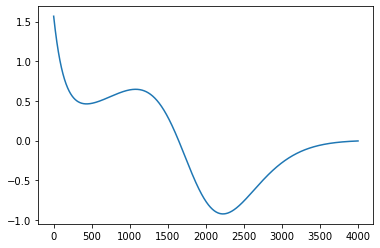

In [ ]:
plt.plot(phi2_diff_all[split_time+1:2*split_time])

In [ ]:
#input=a*np.ones(split_time)[0:split_time-shift]


#x_train=np.stack((input,x_train1), axis=1)
#x_train=x_train.reshape(1,split_time-shift,2)

model = tf.keras.Sequential([#tf.keras.layers.Dense(length, activation="relu"),
                             #tf.keras.layers.Dense(32, activation="relu"),
                             #tf.keras.layers.Dropout(0.8),
                             tf.keras.layers.Dense(60, activation="elu"),
                             tf.keras.layers.Dense(30, activation="elu"),
                             tf.keras.layers.Dense(1)])

optimizer = tf.keras.optimizers.SGD(lr=1e-4, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
#model.compile(optimizer='sgd', loss='mean_squared_error')
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('mae')<0.098):
        print("\n 99% acc reached")
        self.model.stop_training = True
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-6 * 10**(epoch / 20))
ES= tf.keras.callbacks.EarlyStopping(monitor='mae', mode='min', patience=10)
history= model.fit(x_train, y_train, epochs=500)#, callbacks=[CustomCallbacks()])

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

500/500 [==============================] - 1s 2ms/step - loss: 0.5826 - mae: 0.8615
Epoch 2/500
500/500 [==============================] - 1s 2ms/step - loss: 0.4603 - mae: 0.7108
Epoch 3/500
500/500 [==============================] - 1s 2ms/step - loss: 0.4544 - mae: 0.7085
Epoch 4/500
500/500 [==============================] - 1s 2ms/step - loss: 0.4449 - mae: 0.6983
Epoch 5/500
500/500 [==============================] - 1s 2ms/step - loss: 0.4375 - mae: 0.6923
Epoch 6/500
500/500 [=======

In [ ]:
model.summary()
model.save('Dense3.h5') 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (32, 60)                  240       
_________________________________________________________________
dense_1 (Dense)              (32, 30)                  1830      
_________________________________________________________________
dense_2 (Dense)              (32, 1)                   31        
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1 = tf.keras.models.load_model("Dense3.h5")
trainPredict = model1.predict(x_train)
error=np.abs(trainPredict[:,0]*0.001-y_train*0.001)
plt.figure(figsize=(7,5))
plt.plot(trainPredict[3900:4000,0]*0.001, "b",label="The actual acceleration")
plt.plot(y_train[3900:4000]*0.001, "r", label="The predicted acceleration")
#plt.plot(error[3900:4000], "y", label="error")
plt.legend()
plt.grid(True)
plt.xlabel("Time steps")
plt.ylabel("Acceleration")

mean1=np.mean(error)
mean2=np.mean(y_train)

OSError: ignored

In [ ]:
mean2

In [ ]:
a_test=50
random_length=5000

x1=np.zeros((random_length)).squeeze()
x2=np.zeros((random_length)).squeeze()
x1[0]=0.1
x1[1]=0.1001
x2[0]=(x1[1]-x1[0])/di
c1=4.2816e-7
c2=1.568
c3=5.7534
model1 = tf.keras.models.load_model("Dense3.h5")


for t in range(random_length-1):
    #for a in range(1,100):
        hinput=a_test*1000/(4*np.pi)
    
        x1[t+1]=x1[t]+di*x2[t]
        x2[t+1]=x2[t]+di*(-c3*x2[t]+c2*np.cos(x1[t])+c1*hinput*abs(hinput)*np.sin(2*x1[t]))
      
x1_test=np.zeros((1, random_length)).squeeze()
x2_test=np.zeros((1,random_length)).squeeze()
x1_predict=np.zeros((1, random_length)).squeeze()
x2_predict=np.zeros((1,random_length)).squeeze()
dx1=np.zeros((1, random_length)).squeeze()
x1_test[0]=x1[0]
x2_test[0]=x2[0]
x1_predict[0]=x1[0]
x2_predict[0]=x2[0]
for t in range(random_length-1):
  dx1[t]=model1.predict([[x1_test[t],x2_test[t],a_test]])
  sigma=0.05*np.std(dx1)
  noise=np.random.normal(0,sigma)
  dx1[t]=dx1[t]+noise
  x1_test[t+1]=x1_test[t]+x2_test[t]*di
  x2_test[t+1]=x2_test[t]+dx1[t]*di
  # x1_test[t+1]=x1_test[t]+x2_test[t]*di
  # x2_test[t+1]=x2_test[t]+dx1[t]*di
  # if x1_test[t+1]>1.57:
  #    x1_test[t+1]=1.57
#x_difference= x_difference.reshape(length,2)
# plt.figure(figsize=(10, 6))
# plot_series(range(length), x_difference[:,0])
# plot_series(range(length), np.array(trainPredict[:,0]))

In [ ]:
#Absolute error every 0.1s
error=np.abs(x1[1:5000:1]-x1_test[1:5000:1])
p_error=(x1[1:5000:1]-x1_test[1:5000:1])/x1[1:5000:1]
mean=np.mean(error)
error1=np.abs(x1[1:2000:1]-x1_test[1:2000:1])
p_error1=(x1[1:2000:1]-x1_test[1:2000:1])/x1[1:2000:1]
mean1=np.mean(error1)
error2=np.abs(x1[1:5000:1]-x1_test[1:5000:1])
p_error2=(x1[1:5000:1]-x1_test[1:5000:1])/x1[1:5000:1]
mean2=np.mean(error2)

In [ ]:

mean1

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(x1,"b",label="The actual angle ")
plt.plot(x1_test,"r", label="The predicted angle" )
plt.plot(error,"g",label="Predict error")
plt.legend()
plt.text(-200,1.05,"The actual angle",weight="bold",color="blue")
plt.quiver(700, 1, 1, -1, color='b', width=0.005)
plt.text(1400,0.7,"The predicted angle",weight="bold",color="r")
plt.quiver(1400, 0.75, -1, 1, color='r', width=0.005)
plt.text(2000,0.2,"Predict error",weight="bold",color="g")
plt.quiver(2500, 0.13, 1, -1, color='g', width=0.005)
plt.grid(True)
plt.xlabel("Time steps")
plt.ylabel("Angle")

plt.savefig("50test_phi1.png")

plt.figure(figsize=(10, 6))
plt.plot(error)
plt.figure(figsize=(10, 6))
plt.plot(p_error)


Feedback 

In [ ]:
a_test=50
random_length=5000

x1=np.zeros((random_length)).squeeze()
x2=np.zeros((random_length)).squeeze()
x1[0]=0.1
x1[1]=0.1001
x2[0]=(x1[1]-x1[0])/di
c1=4.2816e-7
c2=1.568
c3=5.7534
model1 = tf.keras.models.load_model("Dense3.h5")


for t in range(random_length-1):
    #for a in range(1,100):
        hinput=a_test*1000/(4*np.pi)
    
        x1[t+1]=x1[t]+di*x2[t]
        x2[t+1]=x2[t]+di*(-c3*x2[t]+c2*np.cos(x1[t])+c1*hinput*abs(hinput)*np.sin(2*x1[t]))
      
x1_test=np.zeros((1, random_length)).squeeze()
x2_test=np.zeros((1,random_length)).squeeze()
x1_predict=np.zeros((1, random_length)).squeeze()
x2_predict=np.zeros((1,random_length)).squeeze()
dx1=np.zeros((1, random_length)).squeeze()
x1_test[0]=x1[0]
x2_test[0]=x2[0]
x1_predict[0]=x1[0]
x2_predict[0]=x2[0]
for t in range(random_length-1):
  dx1[t]=model1.predict([[x1_test[t],x2_test[t],a_test]])
  sigma=0.05*np.std(dx1)
  noise=np.random.normal(0,sigma)
  dx1[t]=dx1[t]+noise
  x1_test[t+1]=x1_test[t]+x2_test[t]*di
  x2_test[t+1]=x2_test[t]+dx1[t]*di
  x1_test[1:5000:500]=x1[1:5000:500]
  # x1_test[t+1]=x1_test[t]+x2_test[t]*di
  # x2_test[t+1]=x2_test[t]+dx1[t]*di
  # if x1_test[t+1]>1.57:
  #    x1_test[t+1]=1.57
#x_difference= x_difference.reshape(length,2)
# plt.figure(figsize=(10, 6))
# plot_series(range(length), x_difference[:,0])
# plot_series(range(length), np.array(trainPredict[:,0]))

In [ ]:
#Absolute error every 0.1s
error=np.abs(x1[1:5000:1]-x1_test[1:5000:1])
p_error=(x1[1:5000:1]-x1_test[1:5000:1])/x1[1:5000:1]
mean=np.mean(error)
mean

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(x1,"b",label="The actual angle ")
plt.plot(x1_test,"r", label="The predicted angle" )
plt.plot(error,"g",label="Predict error")
plt.legend()
plt.text(-200,1.05,"The actual angle",weight="bold",color="blue")
plt.quiver(700, 1, 1, -1, color='b', width=0.005)
plt.text(1400,0.7,"The predicted angle",weight="bold",color="r")
plt.quiver(1400, 0.75, -1, 1, color='r', width=0.005)
plt.text(2000,0.2,"Predict error",weight="bold",color="g")
plt.quiver(2500, 0.13, 1, -1, color='g', width=0.005)
plt.grid(True)
plt.xlabel("Time steps")
plt.ylabel("Angle")

# 4. Predict the acceleration.Just know the angle and add noise
Use 4 controls a=[20,40,60,80].
Use model 1 and model 2

The output is ( phi1[2:4002]-phi1[1:4001])-(phi1[1:4001]-phi1[0:4000]), and the input is (phi1[0:4000], phi1[1:4001]-phi1[0:4000],a[0:4000]). 

## 4.1 spilt add noise to all angle, angle velocity, accelation

2.388690455953367
-0.39865368588156364
5.939550511520626
-22.82958059175757
tf.Tensor(
[[ 0.19312105  1.25975801 80.        ]
 [ 0.58996054  0.40769437 20.        ]
 [ 1.45227903  1.01308063 60.        ]
 ...
 [ 0.14363016  0.38664665 40.        ]
 [ 0.13556222  0.37489734 40.        ]
 [ 0.32652979  0.63151126 40.        ]], shape=(16000, 3), dtype=float64)


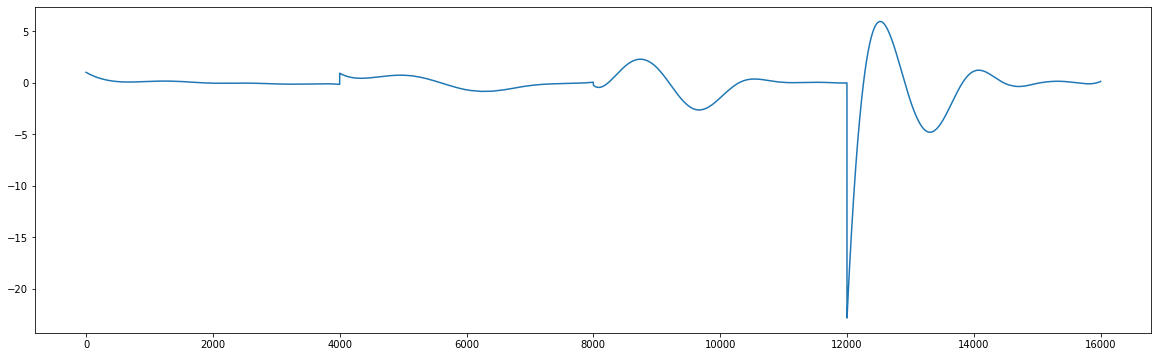

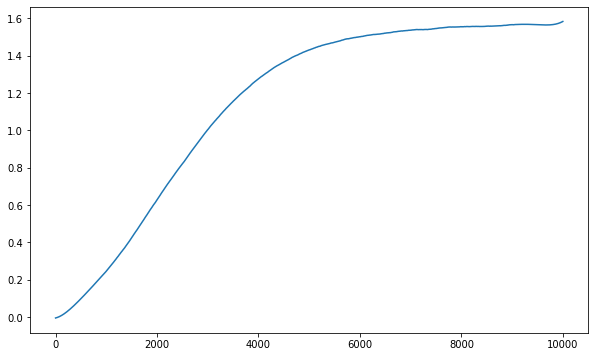

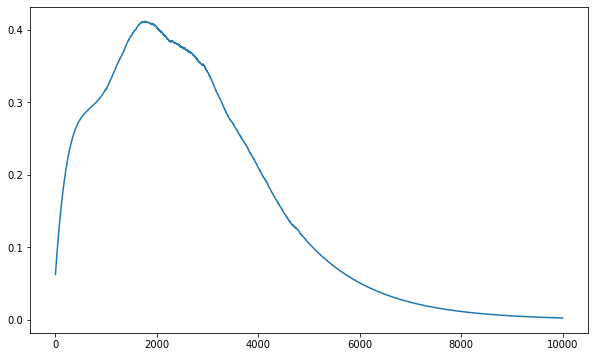

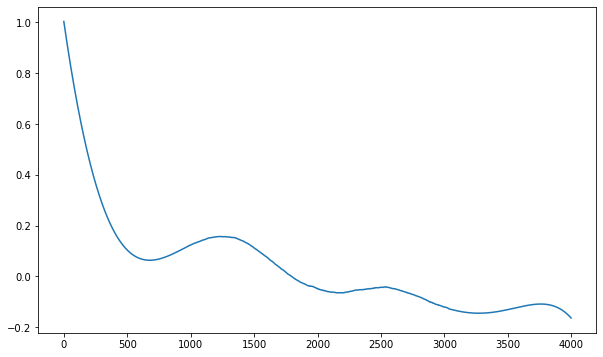

In [ ]:
import scipy
from scipy import signal
from scipy.signal import lfilter

sigma=0.07
def G_noise(x):
  mu=0  
  noise=np.random.normal(mu,sigma, x.shape)
  x=x+noise
  return x

[a1,a2,a3,a4]=[20,40,60,80]
[phi1_a1,phi2_a1,sphi1_a1,sphi2_a1]=function(a1)
[phi1_a2,phi2_a2,sphi1_a2,sphi2_a2]=function(a2)
[phi1_a3,phi2_a3,sphi1_a3,sphi2_a3]=function(a3)
[phi1_a4,phi2_a4,sphi1_a4,sphi2_a4]=function(a4)

split_time =4000
shift=1
sampling_time=1

#sigma=0.02

filter_window=int(1201+sigma*10000)  #1301-2301
filter_poly=5

phi1_a1=signal.savgol_filter(G_noise(phi1_a1), filter_window, filter_poly)
phi1_a2=signal.savgol_filter(G_noise(phi1_a2), filter_window, filter_poly)
phi1_a3=signal.savgol_filter(G_noise(phi1_a3), filter_window, filter_poly)
phi1_a4=signal.savgol_filter(G_noise(phi1_a4), filter_window, filter_poly)
# phi1_a1=G_noise(phi1_a1)
# phi1_a2=G_noise(phi1_a2)
# phi1_a3=G_noise(phi1_a3)
# phi1_a4=G_noise(phi1_a4)
phi1_all=np.concatenate((phi1_a1[:split_time],phi1_a2[:split_time],phi1_a3[:split_time],phi1_a4[:split_time]),axis=0)
# phi1_all=G_noise(phi1_all) #remove the noise. 
# phi12_all=moving_average_forecast(phi1_all, 30)

phi2_a1[:split_time]=(phi1_a1[1:split_time+1]-phi1_a1[:split_time])/di
phi2_a2[:split_time]=(phi1_a2[1:split_time+1]-phi1_a2[:split_time])/di
phi2_a3[:split_time]=(phi1_a3[1:split_time+1]-phi1_a3[:split_time])/di
phi2_a4[:split_time]=(phi1_a4[1:split_time+1]-phi1_a4[:split_time])/di

# phi2_all=G_noise(phi2_all)

phi2_a1=signal.savgol_filter(phi2_a1,filter_window,  filter_poly)
phi2_a2=signal.savgol_filter(phi2_a2, filter_window, filter_poly)
phi2_a3=signal.savgol_filter(phi2_a3, filter_window, filter_poly)
phi2_a4=signal.savgol_filter(phi2_a4, filter_window, filter_poly)

phi2_all=np.concatenate((phi2_a1[:split_time],phi2_a2[:split_time],phi2_a3[:split_time],phi2_a4[:split_time]),axis=0)

phi2_diff_a1=signal.savgol_filter(phi2_a1[1:split_time+1]-phi2_a1[:split_time],filter_window, filter_poly)
phi2_diff_a2=signal.savgol_filter(phi2_a2[1:split_time+1]-phi2_a2[:split_time], filter_window, filter_poly)
phi2_diff_a3=signal.savgol_filter(phi2_a3[1:split_time+1]-phi2_a3[:split_time], filter_window, filter_poly)
phi2_diff_a4=signal.savgol_filter(phi2_a4[1:split_time+1]-phi2_a4[:split_time], filter_window, filter_poly)

phi2_diff_all=np.concatenate((phi2_diff_a1,phi2_diff_a2,phi2_diff_a3,phi2_diff_a4),axis=0)
phi2_diff_all=phi2_diff_all/di


input_a1=a1*np.ones(T)
input_a2=a2*np.ones(T)
input_a3=a3*np.ones(T)
input_a4=a4*np.ones(T)

input=np.concatenate((input_a1[:split_time],input_a2[:split_time],input_a3[:split_time],input_a4[:split_time]),axis=0)

series_input=np.stack((phi1_all,phi2_all,input,phi2_diff_all),axis=1)
series_input=series_input.reshape(4*split_time,4)
series_input=tf.random.shuffle(series_input)
x_train_G=series_input[:,0:3]
y_train_G=series_input[:,3]
plt.figure(figsize=(20, 6))
plt.plot(phi2_diff_all)
#plt.plot((phi2_a1[1:split_time+1]-phi2_a1[:split_time])/di)

print(np.max(phi2_all))
print(np.min(phi2_all))
print(np.max(phi2_diff_all))
print(np.min(phi2_diff_all))
print(x_train_G)
plt.figure(figsize=(10, 6))
plt.plot(phi1_a1)
plt.figure(figsize=(10, 6))
plt.plot(phi2_a1)
plt.figure(figsize=(10, 6))
plt.plot(phi2_diff_all[:split_time])

In [ ]:
mae = np.zeros((10,10))
for r in range(10):
    for s in range(10):
      mae[r,s]=5

mae

array([[5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.],
       [5., 5., 5., 5., 5., 5., 5., 5., 5., 5.]])

In [ ]:
phi2_diff_a1.shape

(4000,)

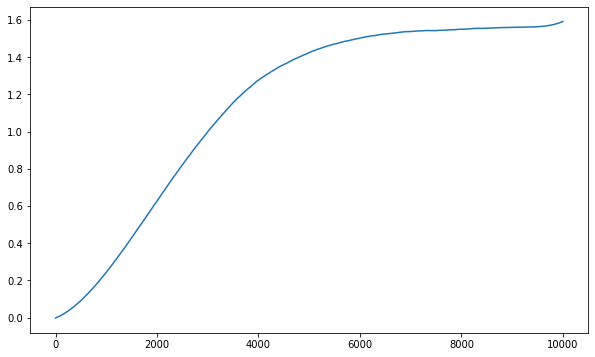

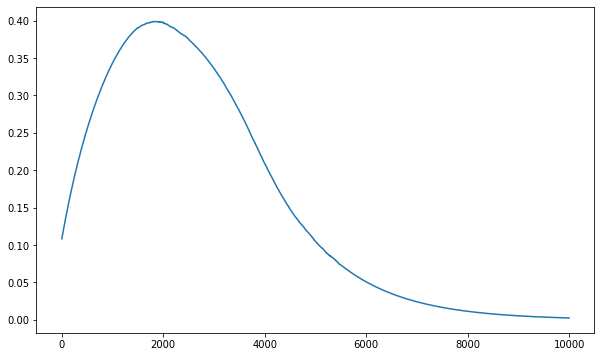

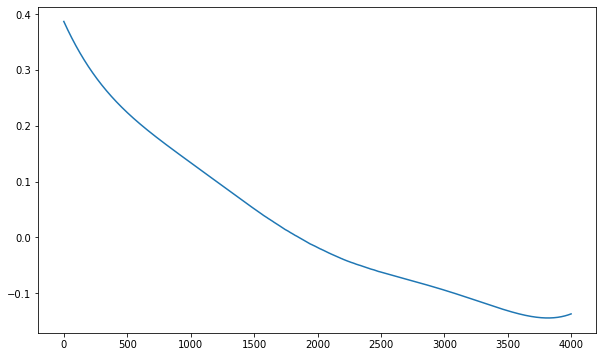

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(phi1_a1)
plt.figure(figsize=(10, 6))
plt.plot(phi2_a1)
plt.figure(figsize=(10, 6))
plt.plot(phi2_diff_all[:split_time])

tf.Tensor(
[[1.44121036e+00 1.07505164e+00 6.00000000e+01]
 [1.61999452e+00 1.84895022e-01 6.00000000e+01]
 [8.32148455e-01 8.84189415e-01 4.00000000e+01]
 ...
 [1.57206200e+00 1.51169864e-02 4.00000000e+01]
 [1.06644082e+00 8.69570446e-01 4.00000000e+01]
 [6.87171399e-01 9.29546409e-01 4.00000000e+01]], shape=(16000, 3), dtype=float64)


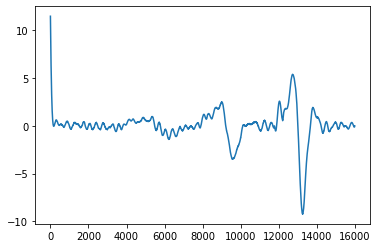

In [ ]:

plt.plot(phi2_diff_all)
#plt.plot(phi2_gall[10000:16000])

np.std(phi1_all)

print(x_train_G)

# plt.plot(phi2_all)
# plt.plot(phi2_diff_all)

In [ ]:
model = tf.keras.Sequential([#tf.keras.layers.Dense(length, activation="relu"),
                             #tf.keras.layers.Dense(32, activation="relu"),
                             #tf.keras.layers.Dropout(0.8),
                             tf.keras.layers.Dense(60, activation="elu"),
                             tf.keras.layers.Dense(30, activation="elu"),
                             tf.keras.layers.Dense(1)])

optimizer = tf.keras.optimizers.SGD(lr=5e-4, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
#model.compile(optimizer='sgd', loss='mean_squared_error')
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('mae')<0.1):
        print("\n 99% acc reached")
        self.model.stop_training = True
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-6 * 10**(epoch / 20))
ES= tf.keras.callbacks.EarlyStopping(monitor='mae', mode='min', patience=10)
history= model.fit(x_train_G, y_train_G, epochs=800, callbacks=[CustomCallbacks()])

Epoch 1/800

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

500/500 [==============================] - 1s 2ms/step - loss: 0.5554 - mae: 0.8507
Epoch 2/800
500/500 [==============================] - 1s 2ms/step - loss: 0.4835 - mae: 0.7433
Epoch 3/800
500/500 [==============================] - 1s 2ms/step - loss: 0.4592 - mae: 0.7171
Epoch 4/800
500/500 [==============================] - 1s 2ms/step - loss: 0.4650 - mae: 0.7314
Epoch 5/800
500/500 [==============================] - 1s 2ms/step - loss: 0.4406 - mae: 0.7036
Epoch 6/800
500/500 [=======

(16000, 1)

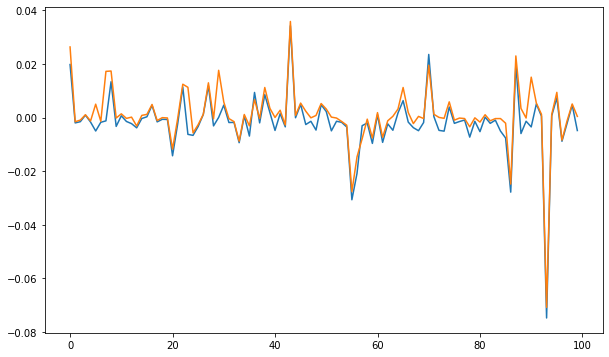

In [ ]:
trainPredict = model.predict(x_train_G)
plt.figure(figsize=(10, 6))
plt.plot(trainPredict[3900:4000]*0.01)
plt.plot(y_train_G[3900:4000]*0.01)
trainPredict.shape

In [ ]:
model.save('noise_0.02.h5') 

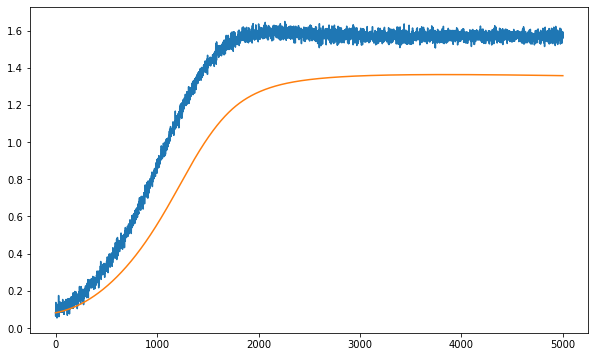

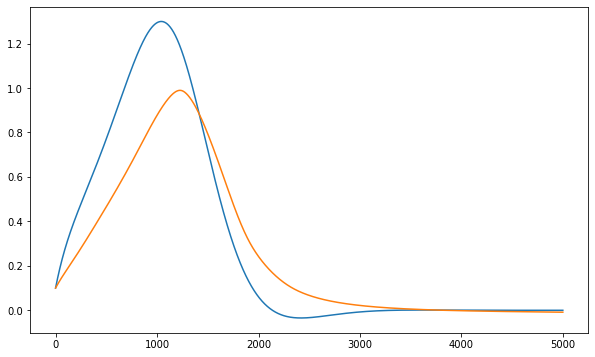

In [ ]:
#model = tf.keras.models.load_model("noise_0.02")


mae = np.zeros((1,10))

for s in range(1):
    def G_noise(x):
                mu = 0
                sigma = 0.02
                noise = np.random.normal(mu, sigma, x.shape)
                x = x + noise
                return x

    a_test = 50
    random_length = 5000

    x1 = np.zeros((random_length)).squeeze()
    x2 = np.zeros((random_length)).squeeze()
    x1[0] = 0.1
    x1[1] = 0.1001
    x2[0] = (x1[1] - x1[0]) / di

    c1 = 4.2816e-7
    c2 = 1.568
    c3 = 5.7534

    for t in range(random_length - 1):
        # for a in range(1,100):
        hinput = a_test * 1000 / (4 * np.pi)

        x1[t + 1] = x1[t] + di * x2[t]
        x2[t + 1] = x2[t] + di * (-c3 * x2[t] + c2 * np.cos(x1[t]) + c1 * hinput * abs(hinput) * np.sin(2 * x1[t]))

    x1 = G_noise(x1)
    x1_test = np.zeros((1, random_length)).squeeze()
    x2_test = np.zeros((1, random_length)).squeeze()
    x1_predict = np.zeros((1, random_length)).squeeze()
    x2_predict = np.zeros((1, random_length)).squeeze()
    x1_test[0] = x1[0]
    x2_test[0] = x2[0]
    dx1 = np.zeros((1, random_length)).squeeze()

    for t in range(random_length - 1):
        dx1[t] = model.predict([[x1_test[t], x2_test[t], a_test]])
        x1_test[t + 1] = x1_test[t] + x2_test[t] * di  # +noise[t]
        x2_test[t + 1] = x2_test[t] + dx1[t] * di

    error = np.abs(x1[1:5000:1] - x1_test[1:5000:1])
    mae[0,s] = np.mean(error)

plt.figure(figsize=(10, 6))
plt.plot(x1)
plt.plot(x1_test)
plt.savefig("50test_phi1.png")

plt.figure(figsize=(10, 6))
plt.plot(x2)
plt.plot(x2_test)
plt.savefig("50test_phi2.png")

In [ ]:
mae

array([[0.13150697, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]])

In [ ]:
a_test=50
random_length=5000

x1=np.zeros((random_length)).squeeze()
x2=np.zeros((random_length)).squeeze()
x1[0]=0.1
x1[1]=0.1001
x2[0]=(x1[1]-x1[0])/di


c1=4.2816e-7
c2=1.568
c3=5.7534
#model = tf.keras.models.load_model("Dense4_1_0.01.h5")


for t in range(random_length-1):
    #for a in range(1,100):
        hinput=a_test*1000/(4*np.pi)
    
        x1[t+1]=x1[t]+di*x2[t]
        x2[t+1]=x2[t]+di*(-c3*x2[t]+c2*np.cos(x1[t])+c1*hinput*abs(hinput)*np.sin(2*x1[t]))

x1=G_noise(x1)      
x1_test=np.zeros((1, random_length)).squeeze()
x2_test=np.zeros((1,random_length)).squeeze()
x1_predict=np.zeros((1, random_length)).squeeze()
x2_predict=np.zeros((1,random_length)).squeeze()
x1_test[0]=x1[0]
x2_test[0]=x2[0]
dx1=np.zeros((1, random_length)).squeeze()

#noise=np.random.normal(0,0.001*np.std(x1), x1.shape)

for t in range(random_length-1):
  dx1[t]=model.predict([[x1_test[t],x2_test[t],a_test]])
  x1_test[t+1]=x1_test[t]+x2_test[t]*di#+noise[t]
  x2_test[t+1]=x2_test[t]+dx1[t]*di
  # x1_test[t+1]=x1_test[t]+x2_test[t]*di
  # x2_test[t+1]=x2_test[t]+dx1[t]*di
  # if x1_test[t+1]>1.57:
  #    x1_test[t+1]=1.57
#x_difference= x_difference.reshape(length,2)
# plt.figure(figsize=(10, 6))
# plot_series(range(length), x_difference[:,0])
# plot_series(range(length), np.array(trainPredict[:,0]))

In [ ]:
a_test=50
random_length=5000

x1=np.zeros((random_length)).squeeze()
x2=np.zeros((random_length)).squeeze()
x1[0]=0.1
x1[1]=0.1001
x2[0]=(x1[1]-x1[0])/di

def G_noise(x):
  mu=0
  sigma=0.2
  noise=np.random.normal(mu,sigma, x.shape)
  x=x+noise
  return x

c1=4.2816e-7
c2=1.568
c3=5.7534


for t in range(random_length-1):
    #for a in range(1,100):
        hinput=a_test*1000/(4*np.pi)
    
        x1[t+1]=x1[t]+di*x2[t]
        x2[t+1]=x2[t]+di*(-c3*x2[t]+c2*np.cos(x1[t])+c1*hinput*abs(hinput)*np.sin(2*x1[t]))

x1=G_noise(x1)  
np.mean(x1)

1.2905840370813917

In [ ]:
error=np.abs(x1[1:5000:1]-x1_test[1:5000:1])
p_error=(x1[1:5000:1]-x1_test[1:5000:1])/x1[1:5000:1]
mean=np.mean(error)
error1=np.abs(x1[1:2000:1]-x1_test[1:2000:1])
p_error1=(x1[1:2000:1]-x1_test[1:2000:1])/x1[1:2000:1]
mean1=np.mean(error1)
error2=np.abs(x1[1:5000:1]-x1_test[1:5000:1])
p_error2=(x1[1:5000:1]-x1_test[1:5000:1])/x1[1:5000:1]
mean2=np.mean(error2)

In [ ]:
print(mean)
print(np.mean(x1))

0.1040767134713056
1.2914036733595031


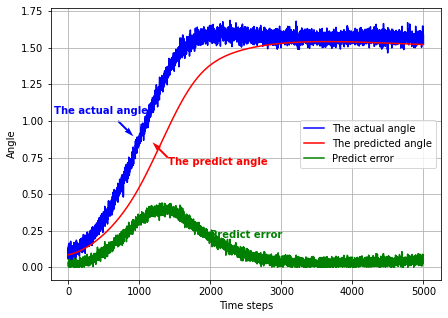

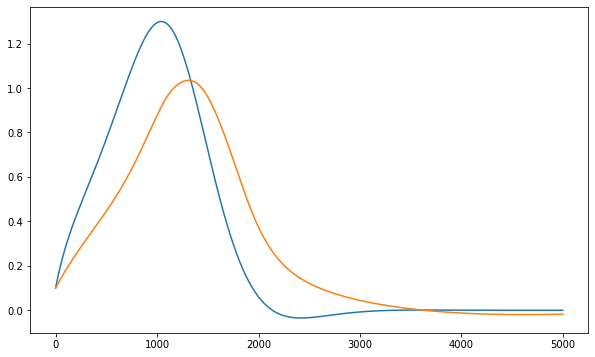

In [ ]:
x1=G_noise(x1) 
plt.figure(figsize=(7,5))
plt.plot(x1,"b",label="The actual angle ")
plt.plot(x1_test,"r", label="The predicted angle" )
plt.plot(error,"g",label="Predict error")
plt.legend()
plt.text(-200,1.05,"The actual angle",weight="bold",color="blue")
plt.quiver(700, 1, 1, -1, color='b', width=0.005)
plt.text(1400,0.7,"The predict angle",weight="bold",color="r")
plt.quiver(1400, 0.75, -1, 1, color='r', width=0.005)
plt.text(2000,0.2,"Predict error",weight="bold",color="g")
plt.quiver(2500, 0.13, 1, -1, color='g', width=0.005)
plt.grid(True)
plt.xlabel("Time steps")
plt.ylabel("Angle")

plt.figure(figsize=(10, 6))
plt.plot(x2)
plt.plot(x2_test)
plt.savefig("50test_phi2.png")

In [ ]:
stds=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
meas=[0.0737,0.0738,0.1521,0.0842,0.6631,0.19, 0.1106,0.5878,0.11]
#random number???????


## 4.2  spilt add noise to all angle, angle velocity, accelation

try high noise 

In [ ]:
import scipy
from scipy import signal
from scipy.signal import lfilter
def G_noise(x):
  mu=0
  sigma=0.01*np.std(x)
  noise=np.random.normal(mu,sigma, x.shape)
  x=x+noise
  return x

def moving_average_forecast(series, window_size):
  """Forecasts the mean of the last few values.
     If window_size=1, then this is equivalent to naive forecast"""
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
  return np.array(forecast)

def smooth(x):
  n=100
  b = [1.0 / n] * n
  a = 1
  yy = lfilter(b,a,x)
  return yy



In [ ]:
[a1,a2,a3,a4]=[20,40,60,80]
[phi1_a1,phi2_a1,sphi1_a1,sphi2_a1]=function(a1)
[phi1_a2,phi2_a2,sphi1_a2,sphi2_a2]=function(a2)
[phi1_a3,phi2_a3,sphi1_a3,sphi2_a3]=function(a3)
[phi1_a4,phi2_a4,sphi1_a4,sphi2_a4]=function(a4)

split_time =6000
shift=1
sampling_time=1
window_size=30
#phi1_a1=smooth(G_noise(phi1_a1))
phi1_a11=G_noise(phi1_a1)
#phi1_a11=signal.savgol_filter(phi1_a11, 501, 6)
phi1_a11=signal.savgol_filter(phi1_a11, 501, 6)
#phi1_a11=moving_average_forecast(phi1_a11, window_size)
# phi1_a2=G_noise(phi1_a2)
# phi1_a3=G_noise(phi1_a3)
# phi1_a4=G_noise(phi1_a4)
# phi1_all=np.concatenate((phi1_a1[:split_time],phi1_a2[:split_time],phi1_a3[:split_time],phi1_a4[:split_time]),axis=0)
# phi1_all=G_noise(phi1_all) #remove the noise. 
# phi12_all=moving_average_forecast(phi1_all, 100)

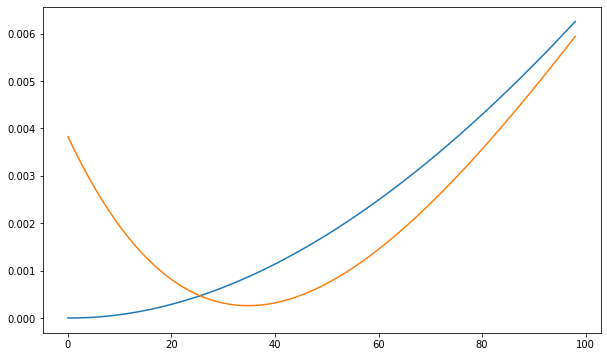

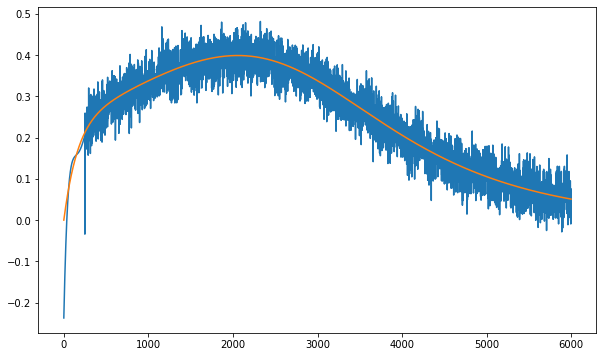

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(phi1_a1[1:100])
plt.plot(phi1_a11[1:100])

#mean_squared_error(phi1_a1,phi1_a11)
plt.figure(figsize=(10, 6))
plt.plot((phi1_a11[1:6000]-phi1_a11[:5999])/di)
plt.plot(phi2_a1[1:6000])
# plt.plot(signal.savgol_filter(phi1_a11[1:6000]-phi1_a11[:3999],201,3))


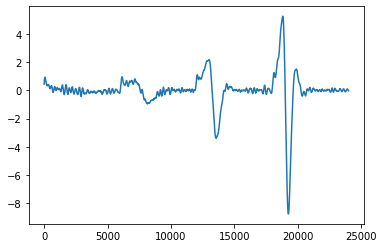

In [ ]:
[a1,a2,a3,a4]=[20,40,60,80]
[phi1_a1,phi2_a1,sphi1_a1,sphi2_a1]=function(a1)
[phi1_a2,phi2_a2,sphi1_a2,sphi2_a2]=function(a2)
[phi1_a3,phi2_a3,sphi1_a3,sphi2_a3]=function(a3)
[phi1_a4,phi2_a4,sphi1_a4,sphi2_a4]=function(a4)

split_time =6000
shift=1
sampling_time=1

phi1_a1=signal.savgol_filter(G_noise(phi1_a1), 501, 6)
phi1_a2=signal.savgol_filter(G_noise(phi1_a2), 501, 6)
phi1_a3=signal.savgol_filter(G_noise(phi1_a3), 501, 6)
phi1_a4=signal.savgol_filter(G_noise(phi1_a4), 501, 6)
# phi1_a1=G_noise(phi1_a1)
# phi1_a2=G_noise(phi1_a2)
# phi1_a3=G_noise(phi1_a3)
# phi1_a4=G_noise(phi1_a4)
phi1_all=np.concatenate((phi1_a1[:split_time],phi1_a2[:split_time],phi1_a3[:split_time],phi1_a4[:split_time]),axis=0)
# phi1_all=G_noise(phi1_all) #remove the noise. 
# phi12_all=moving_average_forecast(phi1_all, 30)

phi2_a1[:split_time]=(phi1_a1[1:split_time+1]-phi1_a1[:split_time])/di
phi2_a2[:split_time]=(phi1_a2[1:split_time+1]-phi1_a2[:split_time])/di
phi2_a3[:split_time]=(phi1_a3[1:split_time+1]-phi1_a3[:split_time])/di
phi2_a4[:split_time]=(phi1_a4[1:split_time+1]-phi1_a4[:split_time])/di

# phi2_all=G_noise(phi2_all)

phi2_a1=signal.savgol_filter(phi2_a1, 501, 6)
phi2_a2=signal.savgol_filter(phi2_a2, 501, 6)
phi2_a3=signal.savgol_filter(phi2_a3, 501, 6)
phi2_a4=signal.savgol_filter(phi2_a4, 501, 6)

phi2_all=np.concatenate((phi2_a1[:split_time],phi2_a2[:split_time],phi2_a3[:split_time],phi2_a4[:split_time]),axis=0)


phi2_diff_all=np.concatenate((phi2_a1[1:split_time+1]-phi2_a1[:split_time],phi2_a2[1:split_time+1]-phi2_a2[:split_time],
                              phi2_a3[1:split_time+1]-phi2_a3[:split_time],phi2_a4[1:split_time+1]-phi2_a4[:split_time]),axis=0)
phi2_diff_all=phi2_diff_all/di
phi2_diff_all=signal.savgol_filter(phi2_diff_all, 501, 6)

input_a1=a1*np.ones(T)
input_a2=a2*np.ones(T)
input_a3=a3*np.ones(T)
input_a4=a4*np.ones(T)

input=np.concatenate((input_a1[:split_time],input_a2[:split_time],input_a3[:split_time],input_a4[:split_time]),axis=0)

series_input=np.stack((phi1_all,phi2_all,input,phi2_diff_all),axis=1)
series_input=series_input.reshape(4*split_time,4)
series_input=tf.random.shuffle(series_input)
x_train_G=series_input[:,0:3]
y_train_G=series_input[:,3]

plt.plot(phi2_diff_all)
#plt.plot((phi2_a1[1:split_time+1]-phi2_a1[:split_time])/di)


tf.Tensor(
[[ 2.21000560e-02  1.82882572e-01  2.00000000e+01]
 [ 1.55774553e+00  5.29375953e-03  8.00000000e+01]
 [ 1.55921301e+00 -2.42418916e-03  4.00000000e+01]
 ...
 [ 1.51581157e+00  1.45649547e-01  4.00000000e+01]
 [ 1.55856465e+00  5.26157252e-01  6.00000000e+01]
 [ 1.44523663e+00  3.32165119e-01  4.00000000e+01]], shape=(24000, 3), dtype=float64)


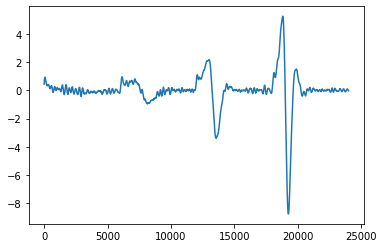

In [ ]:

plt.plot(phi2_diff_all)
#plt.plot(phi2_gall[10000:16000])

np.std(phi1_all)

print(x_train_G)

# plt.plot(phi2_all)
# plt.plot(phi2_diff_all)

In [ ]:
model = tf.keras.Sequential([#tf.keras.layers.Dense(length, activation="relu"),
                             #tf.keras.layers.Dense(32, activation="relu"),
                             #tf.keras.layers.Dropout(0.8),
                             tf.keras.layers.Dense(60, activation="elu"),
                             tf.keras.layers.Dense(30, activation="elu"),
                             tf.keras.layers.Dense(1)])

optimizer = tf.keras.optimizers.SGD(lr=5e-4, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
#model.compile(optimizer='sgd', loss='mean_squared_error')
class CustomCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('mae')<0.098):
        print("\n 99% acc reached")
        self.model.stop_training = True
# lr_schedule = tf.keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-6 * 10**(epoch / 20))
ES= tf.keras.callbacks.EarlyStopping(monitor='mae', mode='min', patience=10)
history= model.fit(x_train_G, y_train_G, epochs=500)#, callbacks=[CustomCallbacks()])

Epoch 1/500

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

750/750 [==============================] - 1s 1ms/step - loss: 0.4219 - mae: 0.6626
Epoch 2/500
750/750 [==============================] - 1s 1ms/step - loss: 0.3136 - mae: 0.5427
Epoch 3/500
750/750 [==============================] - 1s 1ms/step - loss: 0.3046 - mae: 0.5298
Epoch 4/500
750/750 [==============================] - 1s 1ms/step - loss: 0.3008 - mae: 0.5282
Epoch 5/500
750/750 [==============================] - 1s 1ms/step - loss: 0.2963 - mae: 0.5185
Epoch 6/500
750/750 [=======

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 60)                240       
_________________________________________________________________
dense_16 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 31        
Total params: 2,101
Trainable params: 2,101
Non-trainable params: 0
_________________________________________________________________


(24000, 1)

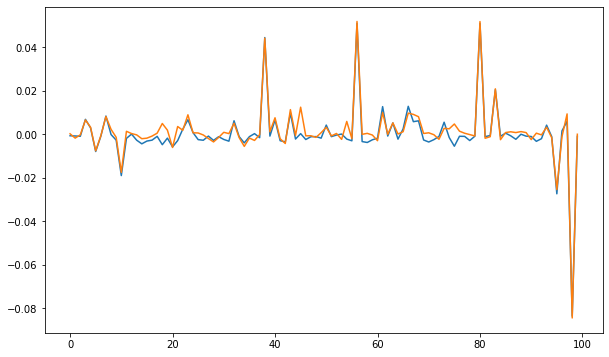

In [ ]:
trainPredict = model.predict(x_train_G)
plt.figure(figsize=(10, 6))
plt.plot(trainPredict[3900:4000]*0.01)
plt.plot(y_train_G[3900:4000]*0.01)
trainPredict.shape

In [ ]:
model.save('Dense4_2.h5') 

In [ ]:
a_test=50
random_length=5000

x1=np.zeros((random_length)).squeeze()
x2=np.zeros((random_length)).squeeze()
x1[0]=0.1
x1[1]=0.1001
x2[0]=(x1[1]-x1[0])/di
c1=4.2816e-7
c2=1.568
c3=5.7534
#model1 = tf.keras.models.load_model("Dense3.h5")


for t in range(random_length-1):
    #for a in range(1,100):
        hinput=a_test*1000/(4*np.pi)
    
        x1[t+1]=x1[t]+di*x2[t]
        x2[t+1]=x2[t]+di*(-c3*x2[t]+c2*np.cos(x1[t])+c1*hinput*abs(hinput)*np.sin(2*x1[t]))

x1=G_noise(x1)      
x1_test=np.zeros((1, random_length)).squeeze()
x2_test=np.zeros((1,random_length)).squeeze()
x1_predict=np.zeros((1, random_length)).squeeze()
x2_predict=np.zeros((1,random_length)).squeeze()
dx1=np.zeros((1, random_length)).squeeze()
x1_test[0]=x1[0]
x2_test[0]=x2[0]
x1_predict[0]=x1[0]
x2_predict[0]=x2[0]
noise=np.random.normal(0,0.001*np.std(x1), x1.shape)

for t in range(random_length-1):
  dx1[t]=model.predict([[x1_test[t],x2_test[t],a_test]])
  x1_test[t+1]=x1_test[t]+x2_test[t]*di#+noise[t]
  x2_test[t+1]=x2_test[t]+dx1[t]*di
  # x1_test[t+1]=x1_test[t]+x2_test[t]*di
  # x2_test[t+1]=x2_test[t]+dx1[t]*di
  # if x1_test[t+1]>1.57:
  #    x1_test[t+1]=1.57
#x_difference= x_difference.reshape(length,2)
# plt.figure(figsize=(10, 6))
# plot_series(range(length), x_difference[:,0])
# plot_series(range(length), np.array(trainPredict[:,0]))

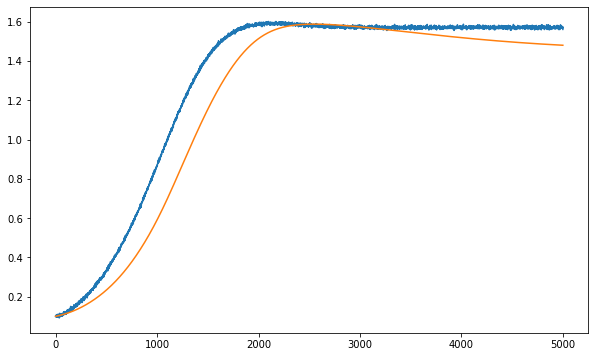

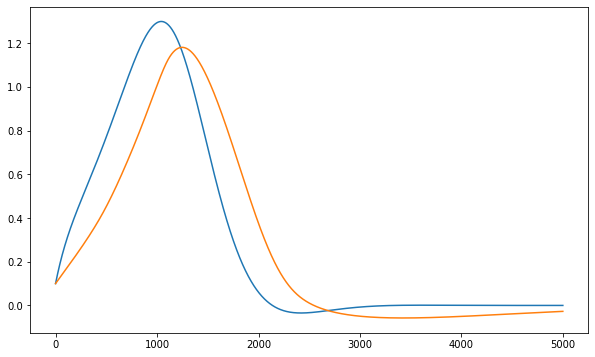

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(x1)
plt.plot(x1_test)
plt.savefig("50test_phi1.png")

plt.figure(figsize=(10, 6))
plt.plot(x2)
plt.plot(x2_test)
plt.savefig("50test_phi2.png")